# Workbook 3: Informed Search Algorithms

## Introduction
This practical uses a simple easy-to-visualise optimisation problem to illustrate the properties of different search algorithms.
The problem is this:
- We are given  a model of a problem in terms of a graph  - which we can visualise as a maze.
- We are given a starting position and the desired endpoint (goal)
- The problem is to find a sequence of inputs that takes us from the start to the goal, preferably in as few moves as possible.

## Aims of this practical
1. To give you the opportunity to demonstrate your understanding by implementing the code needed to create different search algorithms.
2. To give you experience of comparing the behaviour of different search algorithms.
3. To give you experience of evaluating the efficiency of an algorithm for a problem ( in this case path-planning) by creating different instances of a problem (mazes) to *stress-test* different methods. 


<div class="alert alert-block alert-danger" style="color:black">
    <h2> This is an assessed practical</h2>
    When you are satisfied that you have completed the activities as required you should:
    <ol>
        <li> Save your notebooks and download them to your local machine.</li>
        <li> Submit them for automatic marking and feedback <ul>
            <li>by following the links in the <i>Assessments</i> folder on Blackboard.</li>
            <li> This may invovle answering some multiple choices questions s well a submitting your code.</li>
            </ul>
        <li> <b>Read the feedback provided</b> and use it to improve your work.<br>
            You will have four attemtps to submit each notebook.</li>
    </ol></div>
 
   

## Background

As discussed in the lectures, we consider a general generate-and-test framwework for search that can be easily:
- adapted to provide algorithms with different behaviours
- applied to many different problems.
This is illustrated in the flowchart below.

<img src = "figures/generate-and-test-framework.png">

In this week's lecture presentation ( available in the notebook **W3_Inforned_Search_Algorithms.ipynb**)
we discussed how to create different algorithms, with different behaviours, just by adapting the function **select_and_move_from_openlist()**.

In last week's lab session you should have:
1. Got familiar with a general implementation framework we provided with classes for:
  - **SingleMemberSearch**
  - **Problem**
  - **CandidateSolution**
2. Created your own search subclasses **DepthfirstSearch** and **BreadthFirstSearch** 
  - by over-riding the function **select_and_move_from_openlist()**
3. Applied those algorithms to two sublasses of problem: **CombinationLock** and **FoxChickenGrain**


## This week
You will extend that work to:
1. Create your own implementations of the algorithms **LocalSearch**, **BestFirstSearch**, and **AStarSearch**
2. Test their behaviour on a simple maze problem 
   because it is easy to visualise, and  many search graphs can be represented as  mazes.
3. **Test your understanding** by making mazes that *break* different algorithms.

<div style="color:black;background:#AFE1AF">
 <h2>Refresher: finding things in a list with python according to some criteria</h2>
    <h3> You can skip reading this box if you are comfortable with how to do this</h3>
    <ul>
        <li> A python list (let's call it <i>my_list</i>) holds a collection of objects, usually of the same type. </li>
        <li> If you have a list <i>my_list</i> with n elements, then <i>len(myList) = n</i> </li>
    <li> This is true whether the elements are chars, ints, float, or objects of some class</li>
    </ul>
    <p> If  <i>my_list</i> holds elements (objects) of a type that has an attribute <i>cost</i>, and we want to find the index (position) of the element one with the lowest value, we do it with a loop. Start in position 0, then loop through every thing in the list one by one, looking at the value of <i>cost</i>each element, remembering the position (index) of the one with the lowest <i>cost</i>.</p>
    <p> In code this looks like:</p>
    <pre lang="python" style="background:#F1F1F1">    
   best_index = 0
   <span style="color:green">for</span> i <span style="color:green">in range</span> (<span style="color:green">len</span> (my_list) ):    <span style="color:blue"># for historical reasons we often use i as the name of a loop variable </span>
       <span style="color:green">if</span> my_list[i].cost < my_list[best_index].cost : 
           best_index = i
   </pre>

<p> So at the end of this process the variable best_index tells us the index of the "best" element in that list according to our choice criteria (minimising cost).
<ul>
<li>If we want to use something else as our criteria, we just change the if statement.</li>
<li>Sometimes you might choose to store the value <i> best_so_far = my_list[best_index].cost</i> <br>
and use that in the comparison (line 3 above) to make your code more readable (shorter lines)<br>
- you just need to update <i>best_so_far</i> as well as <i>best_index</i> inside the <b>if</b> statement.</li>
</ul>
So this different version of the code does the same thing but you may find it easier to read.
<pre lang="python" style="background:#F1F1F1">
    best_index = 0
    best_so_far = my_list[0].cost
    <span style="color:green">for</span> index <span style="color:green">in range</span> (len (my_list) ): 
        this_cost= my_list[index].cost
        <span style="color:green">if</span> this_cost < best_so_far: 
            best_index = index
            best_so_far = this_cost
</pre>
</div>
                                       
                                       
                                       

.

.

.

.
.

# Part One: Familiarising yourself with the code framework
From last week you should be familiar with the basic classes in our framework:
- **Problem()**
- **CandidateSolution**
- **SingleMemberSearch**

and you should have created two subclasses:
- **DepthFirstSearch**
- **BreadthFirstSearch**

**If you have not done worksheet 2, go back and do that first**
- Otherwise you will probably waste a lot of time.

If you want to look at the maze code it is in the file *maze.py*  
- it's a little complex, mostly to do with translating a lot between:
  - one-d arrays (cells have single index) and 
  - 2-d arrays (cells referenced by row  and column co-ordinates)
- so you may prefer to focus on your code implementation of different algorithms
The file *maze.txt* provides a definition for **one specific** maze instance. 

<div class="alert alert-block alert-warning" style="color:black">
    <h1>Activity: Testing your Depth-first and Breadth-First Search code on the maze</h1>
    <h2>30 marks</h2>.
    Take the steps below to run and test your code from last week on the maze problems.<ol>
        <li> Run the first cell below to import the Maze Class</li>
        <li> <b><i>Optionally</i></b> run the second cell below to see the help from the class' docstrings.</li>
        <li> Run the third cell to define a method that will run an algorithm on the maze</li>
    <li> Copy-paste your class code for <b>DepthFirstSearch</b> from workbook2 into the fourth cell below.<br>
            Then run that cell so you can see if your code solves the maze.<br>
             If there are errors fix them before you proceed.</li>
    <li> Copy-paste your class code for <b>BreadthFirstSearch</b> from workbook2 into the fifth cell below.<br>
            Then run that cell so you see if your code solves the maze.<br>
             If there are errors fix them before you proceed.</li>
        <li> Run cell six which defines tests for your code, then seven and eight which runs them for your two classes.<ul>
             <li>Make sure you understand what the code is doing. </li>
            <li>The values for number of trials and length of path come from my reference implementation.</li>
            <li> <b>Your code should solve the maze</b> and produce the same values.</li>
            </ul>
    </ol>
    <p>If your code passed the tests for the <b>CombinationLock</b> problem last week it should work fine.<br>
        If not:</p><ul>
    <li>Edit your code in the cells below</li>
    <li> <b> Important</b> the __str__() method must return the same string as I use in cell 6 below</li>
    <li>Rerun those cells to tell python to use the edited versions.</li>
    <li> Then rerun the test cells as necessary</li>
    <li> You can turn on printing of the runlog in the test cells if it helps you debug your code.</li>
    </ul>
</div>

<div class="alert alert-block alert-warning" style="color:black">
    <h2> If you find the screen flickering disturbing</h2>
    <b> Apologies!</b>
       There is a trade-off between how long to pause after each move which affects the time taken to do a run, and how likely the screen is to flicker.  It can be hard to judge that with a distributed server.
    <ul>
        <li>open the file <i>maze.py</i> in the jupyter editor. </li>
        <li> increase the default value of <i>refresh_rate</i> on line 94</li>
        <li>rerun the first cell below to reload the Maze class</li></ul>
 </div>

In [1]:
# Cell 1
# you MUST run this cell

from importlib import reload

# the libraries writtten for this course
from singlemembersearch import SingleMemberSearch

# doing it this way lets you edit maze without retstating the kernel
import maze

reload(maze)
from maze import Maze

In [2]:
# Cell 2
# Running this cell gives you a list of class methods and what they do
help(Maze)

Help on class Maze in module maze:

class Maze(problem.Problem)
 |  Maze(mazefile: str)
 |  
 |  Class definition for a rectangular maze problem.
 |  
 |  Method resolution order:
 |      Maze
 |      problem.Problem
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mazefile: str)
 |      Constructor.
 |      
 |      Parameter
 |      ---------
 |      mazefile(str)
 |         name of the file holding the maze definition
 |  
 |  cellid_to_coords(self, cellid: int) -> tuple[int, int]
 |      Converts an index back to coordinates.
 |      
 |      Parameters
 |      ----------
 |      cellid(int)
 |          index
 |      
 |      Returns
 |      -------
 |      tuple(x coordinate,y coordianate)
 |  
 |  colour_cell_from_id(self, cellid: int, colour: float)
 |      Assigns colour to cell in rectangular representation of maze.
 |      
 |      Parameters
 |      ----------
 |      cellid(int)
 |           index in list representation
 |      colour (float)
 

In [3]:
# Cell 3
def run_on_maze(
    algorithm: SingleMemberSearch, show_runlog: bool = False, mazefile: str = "maze.txt"
) -> tuple[int, int]:
    mymaze = Maze(mazefile="maze.txt")
    mysearch = algorithm(mymaze, constructive=True, max_attempts=1500)
    name = mysearch.__str__()
    trials = -1
    moves = -1
    found = mysearch.run_search()
    if found:
        trials = mysearch.trials
        moves = len(mysearch.result)
        print(
            f"search using {mysearch.__str__()} algorithm successful after {trials} attempts"
            f" length of path is {moves} moves."
        )
    else:
        print("solution not found in time allowed")
        if show_runlog:
            print(mysearch.runlog)

    del mymaze
    return trials, moves, name

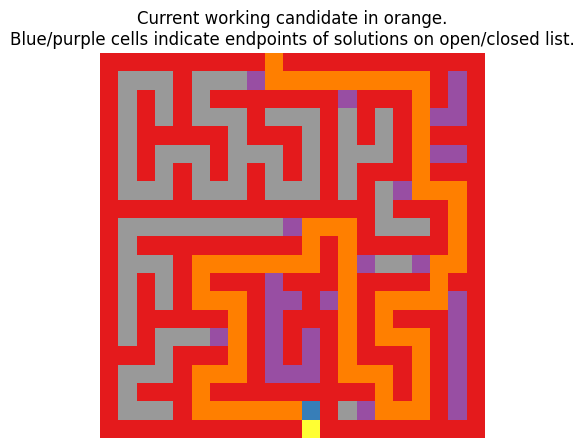

search using depth-first algorithm successful after 408 attempts length of path is 77 moves.


(408, 77, 'depth-first')

In [4]:
# Cell 4
# Copy-paste your class code for DepthFirstSearch from last week to here
import copy
import importlib

from problem import Problem
from candidatesolution import CandidateSolution
from singlemembersearch import SingleMemberSearch


class DepthFirstSearch(SingleMemberSearch):
    """your implementation of depth first search to extend
    the superclass SingleMemberSearch search.
    Adds  a __str__method
    Over-rides the method select_and_move_from_openlist
    to implement the algorithm
    """

    def __str__(self):
        return "depth-first"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """void in superclass
        In sub-classes should implement different algorithms
        depending on what item it picks from open_list
        and what it then does to the open list

        Returns
        -------
        next working candidate (solution) taken from open list
        """
        # next_soln = CandidateSolution()
        # =======>> INSERT YOUR PSEUDO-CODE and your code below <<====
        return self.open_list.pop(-1)

run_on_maze(DepthFirstSearch)

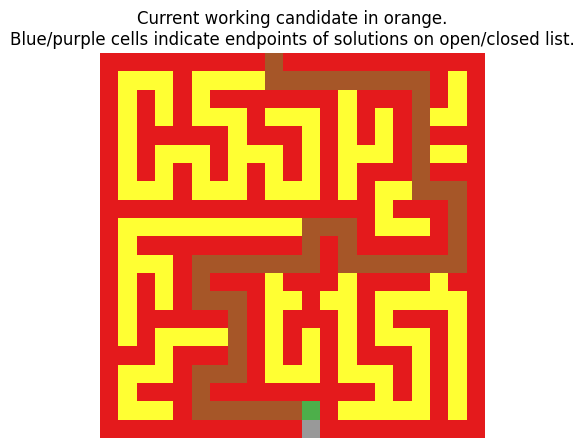

search using breadth-first algorithm successful after 1068 attempts length of path is 57 moves.


(1068, 57, 'breadth-first')

In [5]:
# Cell 5
# Copy-paste your class code for BreadthFirstSearch from last week to here
class BreadthFirstSearch(SingleMemberSearch):
    """your implementation of depth first search to extend
    the superclass SingleMemberSearch search.
    Adds  a __str__method
    Over-rides the method select_and_move_from_openlist
    to implement the algorithm
    """

    def __str__(self):
        return "breadth-first"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Implements the breadth-first search algorithm

        Returns
        -------
        next working candidate (solution) taken from open list
        """

        # next_soln = CandidateSolution()
        # =====> INSERT YOUR PSEUDO-CODE and your code here
        # =====>to implement the algorithm from the cell above
        return self.open_list.pop(0)

run_on_maze(BreadthFirstSearch)

In [6]:
# Cell 6 general test code with my results in

jims_results: dict = {
    "depth-first": [408, 77],
    "breadth-first": [1068, 57],
    "local search": [-1, -1],
    "best-first": [856, 57],
    "A Star": [812, 57],
}


def test_on_maze(algorithm: SingleMemberSearch, mazefile="maze.txt"):
    trials, moves, name = run_on_maze(algorithm, mazefile)
    correct_trials, correct_moves = jims_results[name]

    print(f"testing algorithm {name} on the simple maze.")
    if trials == -1 or moves == -1:
        errstr1 = "Error, the test suggests your code is not reaching the goal"
        errstr2 = "Error, the test suggests your code is not reaching the goal"

    else:
        errstr1 = (
            f"Error: your code is using {trials} trials "
            f" but should only need {correct_trials}.\n"
        )
        errstr2 = (
            f"Error: your code finds a solution with {moves} "
            f" but should only need {correct_moves}.\n"
        )
    assert trials == correct_trials, errstr1
    assert moves == correct_moves, errstr2
    print("test passed")

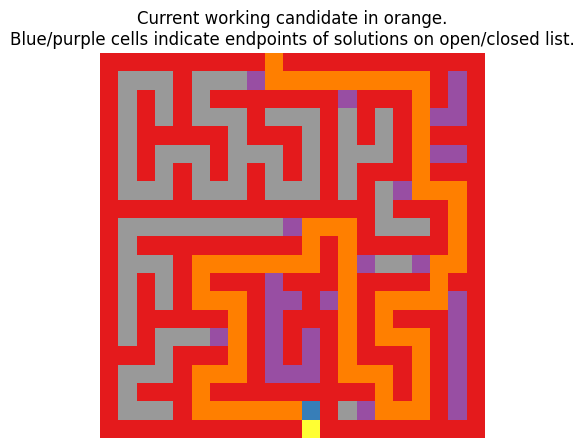

search using depth-first algorithm successful after 408 attempts length of path is 77 moves.
testing algorithm depth-first on the simple maze.
test passed


In [7]:
# Cell 7 test depth-first


print("Testing Depth-First Search")
test_on_maze(DepthFirstSearch)

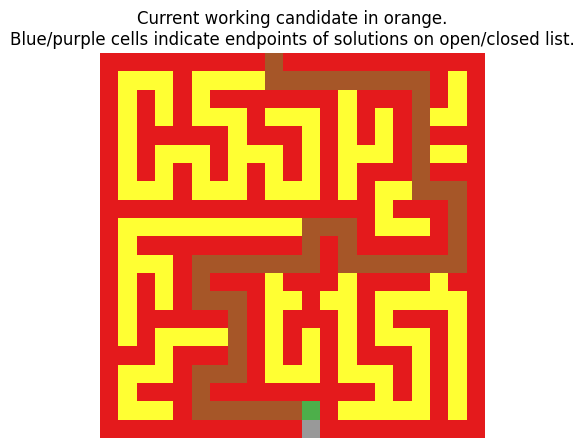

search using breadth-first algorithm successful after 1068 attempts length of path is 57 moves.
testing algorithm breadth-first on the simple maze.
test passed


In [8]:
# run this cell to test your breath-first implementation


print("Testing Breadth-First Search")
test_on_maze(BreadthFirstSearch)

<div class = "alert alert-warning" style="color:black">
    <h1> Activity Two: Implementing Best-First and A Star Search</h1>
    <h2> 40 Marks</h2>
    <p> For these two algorithms the cells below provide the pseudo-code, a partially completed implementation, and a test.</p> <p>This activity requires you to complete the code to produce classes which implement the algorithms, using the pseudocode as your guide.</p>
        <p> You are strongly advised to proceed by:</p> <ol>
        <li> Copying the pseudo-code into an appropriate place in the class code</li>
        <li> Turning the pseudo-code into comments with spaces between for your code</li> 
        <li> Your code should start by checking whether the open list is empty <ul>
            <li>  return None if open list is empty</li>
            <li> Otherwise select and return the appropriate item from the openlist </li>
            </ul>
    <li> Then answer the multiple choice questions to check your understanding</li>
        </ol>
        <h3>Hints:</h3><ul>
               <li> Use the reminder at the start of this workbook for how to select from a list by value</li>
<li> Remember that each instance of the  class defines an attribute <i> self.open_list</i> </li>
       <li>  Everything on that list should be of type <b>CandidateSolution</b> <br>
           and have attributes <i> quality</i> and <i>variable_values</i>.</li>
        <li> For any list <i>mylist</i> you can query how many things it holds via <i>len(mylist)</i></li>
        </ul>
    </div>

## Pseudocode for function SelectAndMoveFromOpenList in Best-First Search

<div style="background:#F0FFFF">
<p style="color:darkredmargin-bottom:0pt"><em>SelectAndMoveFromOpenList</em></p>
<dl style="margin-top:0pt">
    <dt>&nbsp;&nbsp;&nbsp;<b>IF</b> IsEmpty( open_list) <b>THEN</b> </dt>
    <dd> RETURN None</dd>
    <dt> &nbsp;&nbsp;&nbsp;<b>ELSE</b></dt>
    <dd>bestChild &larr; <b>GetMemberWithHighestQuality</b>(openList)</dd>
    <dd> RETURN bestChild&nbsp;&nbsp;&nbsp;&nbsp;<span style="background:pink">Best-First keeps the openlist to allow backtracking</span></dd>
</dl>
</div>   

In [9]:
class BestFirstSearch(SingleMemberSearch):
    """Implementation of Best-First   search.
    You need to complete this
    """

    def __str__(self):
        return "best-first"
    
    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Implements Best First by finding, popping and returning member from openlist
        with best quality.

        Returns
        -------
        next working candidate (solution) taken from open list
        """
        # next_soln = CandidateSolution()
        # ====> Your Code here <========
        # Start by copy in pseudo-code
        # then code to it
        # mske sure you have read the specifications and hints above
        
        self.open_list = sorted(self.open_list, key=lambda item: item.quality)
        return self.open_list.pop(0)
        # return next_soln
        # return self.open_list.pop(-1)
    

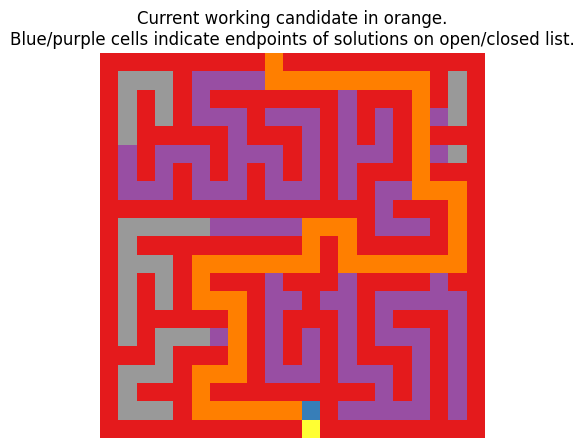

search using best-first algorithm successful after 856 attempts length of path is 57 moves.
testing algorithm best-first on the simple maze.
test passed


In [10]:
# run this to test your implementation
print("Testing Best-First Search")
test_on_maze(BestFirstSearch)

## Pseudocode for function SelectAndMoveFromOpenList in AStar Search

<div style="background:#F0FFFF">
<p style="color:darkred;margin-bottom:0pt"><em>SelectAndMoveFromOpenList</em></p>
<dl style="margin-top:0pt">
    <dt>&nbsp;&nbsp;&nbsp;<b>IF</b> IsEmpty( open_list) <b>THEN</b> </dt>
    <dd> RETURN None</dd>
    <dt> &nbsp;&nbsp;&nbsp;<b>ELSE</b></dt>
    <dd><span style="background:pink">AStar picks using sum of quality +cost</span></dd>
    <dd>bestChild &larr; <b>GetMemberWithHighestCombinedScore</b>(openList)</dd>
    <dd> RETURN bestChild&nbsp;&nbsp;&nbsp;&nbsp;</dd>
</dl>
</div>   
<div style="background:white"> <h3>Note that</h3><ul>
    <li>This is just like best-first with a modified selection.</li>
    <li> To make more efficient you can track <i>bestSoFar</i> and modify <b>UpdateWorkingMemory()</b><br>
        so it doesn't put things on the openlist if depth > bestSoFar </li></ul>  </div> 

In [11]:
class AStarSearch(SingleMemberSearch):
    """Implementation of A Star  search.
    You need to complete this
    """

    def __str__(self):
        return "A Star"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Implements AStar by finding, popping and returning member from openlist
        with lowest combined length+quality.

        Returns
        -------
        next working candidate (solution) taken from open list
        """
        next_soln = CandidateSolution()
        # ====> Your Code here <========
        # Start by copy in pseudo-code
        # then code to it
        # mske sure you have read the specifications and hints above

        while len(self.open_list) == 0:
            self.open_list = sorted(self.open_list, key = lambda item: item.evaluate()[0])
        return next_soln
    
    # =========== the main search loop ======================================
    def run_search(self) -> bool:
        """The main loop for single member search.
        Returns True/False for success or failure.
        """
        self.trials = 1  # used 1 in init

        # PS  WHILE IsNotEmpty( open_list) DO
        # add a couple of other conditions to provide early stopping
        while self.trials < self.max_attempts and not self.solved:
            self.runlog += f"{len(self.open_list)} candidates on the openList.\n"

            # PS working_candidate <- SelectAndMoveFromOpenList(algorithm_name)
            working_candidate = self.select_and_move_from_openlist()
            if working_candidate is None:
                self.runlog += "ran out of promising solutions to test\n"
                return False

            # PS FOR sample in SAMPLE_SIZE DO
            self.runlog += (
                " Next iteration working candidate quality "
                f"{working_candidate.quality}.\n"
            )
            for pos in self.positions:
                for newval in self.problem.value_set:
                    # ==== GENERATE === #
                    # make deepcopy so the original is not changed
                    neighbour = super().deepcopy(working_candidate)

                    # PS neighbour ← ApplyMoveOperator (working_candidate)
                    if self.constructive:  # extend current solution
                        neighbour.variable_values.append(newval)

                    else:  # perturbative changes existing values
                        neighbour.variable_values[pos] = newval
                        oldval = working_candidate.variable_values[pos]
                        # avoid retesting to be efficient
                        if self.already_seen(neighbour) or newval == oldval:
                            continue

                    # === TEST === #
                    # PS status ← Test ( neighbour)       Problem-specific code
                    neighbour.quality, neighbour.reason = self.problem.evaluate(
                        neighbour.variable_values
                    )
                    self.trials += 1

                    # === UPDATE WORKING MEMORY === #
                    self.update_working_memory(neighbour)
                    if self.solved:
                        return True

            # end over loop of neighbors of working candidate
            # PS AppendToClosedList(workingCandidate)
            self.closed_list.append(working_candidate)

        # while loop has ended
        if not self.solved:
            self.runlog += "failed to find solution to the problem in the time allowed!"
        return self.solved

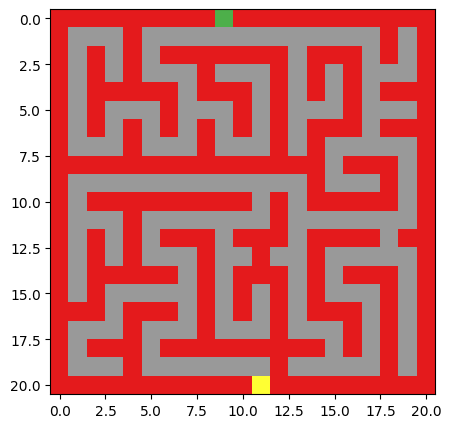

AttributeError: 'super' object has no attribute 'deepcopy'

In [12]:
# run. this to test your A Starprint('Testing Breadth-First Search')
test_on_maze(AStarSearch)

<div class="alert alert-warning" style="color:black">
    <h1> Activity 3: Testing your understanding</h1>
    <h2> 20 marks</h2>
    Run the cell below and answer the questions then press the <b>check</b> button to check your answers. <br>
    When you submit your jupyter notebook for automated marking via blackboard, <br>
    there will be similar questions for you to answer online.
    </div>
    

     

In [ ]:
import workbook3_utils as wb3

reload(wb3)
display(wb3.Q1)
display(wb3.Q2)
display(wb3.Q3)
display(wb3.Q4)
display(wb3.Q5)
display(wb3.Q6)
display(wb3.Q7)
display(wb3.Q8)

<div class="alert alert-warning" style="color:black">
    <h2> Activity 4: Testing your understanding by creating new instances to <it>break</it> algorithms</h2>
    <h3> 10 Marks</h3>
    <p> The cells below illustrate how to create a new instances of the path-finding problem by changing walls into paths or vice-versa.</p>
    <p> The fourth cell also shows how to save an edited maze to file and then checks it load properly</p>
    <p><b> Experiment with creating new mazes then:</b></p>
    <ol>
        <li> Create a maze in which depth-first search gets stuck in a loop<br>
            and save your new maze to file called <i>maze-loop.txt</i> </li>
        <li> Create a maze in which breadth-first search finds the goals in fewer trials than depth-first<br>
            and save this to file <i>maze-odd.txt</i></li>
    </ol>
    </div>
     

In [ ]:
original = Maze(mazefile="maze.txt")
original.show_maze()
search1 = DepthFirstSearch(original, constructive=True, max_attempts=1500)
search1.run_search()
print("first plot shows the initial maze")
print(
    (
        f"{search1.__str__()} took {search1.trials} "
        f"to find. solution of {len(search1.result)} moves"
    )
)

In [ ]:
# this is an example of how to make a hole in a wall
# in this case underneath the entrance a few blocks down
# the first value is for the row of the cell to change, the second for the column
hole_in_wall = Maze(mazefile="maze.txt")
hole_in_wall.contents[8][10] = 1
hole_in_wall.show_maze()

search2 = DepthFirstSearch(hole_in_wall, constructive=True, max_attempts=1500)
found = search2.run_search()
print("second plot shows removing a wall cell")
if found:
    print(
        (
            f"{search2.__str__()} took {search2.trials} trials "
            f"to find. solution of {len(search2.result)} moves"
        )
    )
else:
    print("{search2.__str__()} search ran out of time")

In [ ]:
# and this turns a path into a wall
new_wall = Maze(mazefile="maze.txt")
new_wall.contents[19][16] = 0
new_wall.show_maze()

search3 = DepthFirstSearch(new_wall, constructive=True, max_attempts=1500)
search3.run_search()
print("third plot shows creating a new wall cell near the bottom right")
print(
    (
        f"{search3.__str__()} took {search3.trials} trials "
        f"to find. solution of {len(search3.result)} moves"
    )
)

In [ ]:
# demonstration of saving edited maze and reloading
reload(maze)
from maze import Maze

# load maze
new_wall = Maze(mazefile="maze.txt")

# edit it
new_wall.contents[19][16] = 0
new_wall.show_maze()
# save edited maze to new file
new_wall.save_to_txt("maze-newwall.txt")

In [ ]:
# reload into new maze object
reloaded_maze = Maze(mazefile="maze-newwall.txt")
# test they have the same contents
assert reloaded_maze.contents == new_wall.contents
print("the same")

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>